 Ridge Regression Results 
Best alpha (λ): 44.98
Intercept: 46.42
Coefficients:
mileage: -1.260
engine_size: 2.332
horsepower: 1.732
torque: 1.354
doors: 1.221
airbags: 1.548
weight: 2.057
fuel_efficiency: -0.919
brand_score: 0.879
luxury_index: 1.466
R² (Ridge): 0.491
MAE (Ridge): 6.295
MSE (Ridge): 60.896
RMSE (Ridge): 7.804

OLS Results
R² (OLS): 0.513
MAE (OLS): 6.174
MSE (OLS): 58.282
RMSE (OLS): 7.634


<Figure size 1000x600 with 0 Axes>

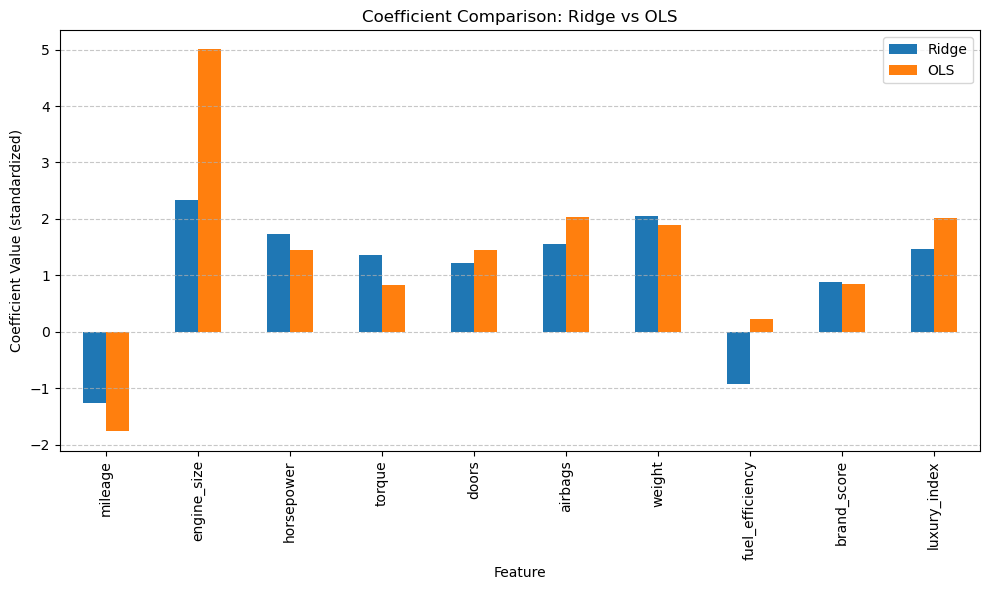

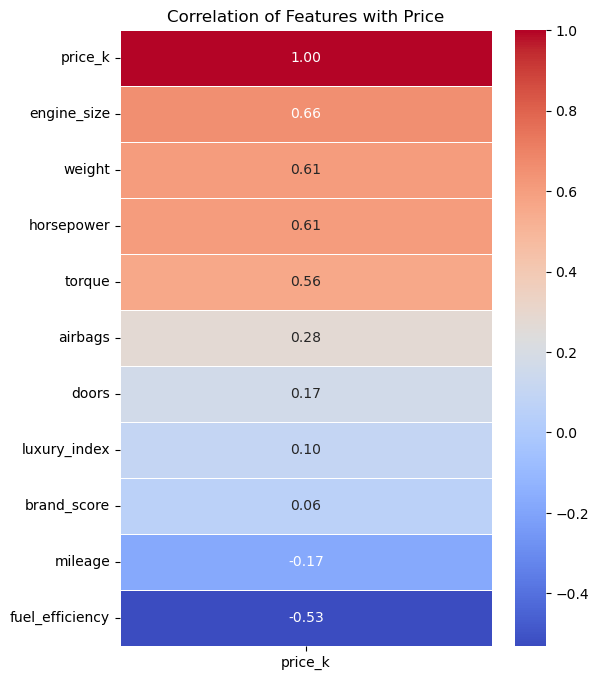

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv(r"C:\AI workforce\Car price Prediction\cars_ridge.csv")

X = df.drop(columns=["price_k"])
y = df["price_k"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 50)  
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_cv.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)
r2_ols = r2_score(y_test, y_pred_ols)

print(" Ridge Regression Results ")
print(f"Best alpha (λ): {ridge_cv.alpha_:.2f}")
print(f"Intercept: {ridge_cv.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge_cv.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"R² (Ridge): {r2_ridge:.3f}")
print(f"MAE (Ridge): {mean_absolute_error(y_test, y_pred_ridge):.3f}")
print(f"MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge):.3f}")
print(f"RMSE (Ridge): {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.3f}")

print("\nOLS Results")
print(f"R² (OLS): {r2_ols:.3f}")
print(f"MAE (OLS): {mean_absolute_error(y_test, y_pred_ols):.3f}")
print(f"MSE (OLS): {mean_squared_error(y_test, y_pred_ols):.3f}")
print(f"RMSE (OLS): {np.sqrt(mean_squared_error(y_test, y_pred_ols)):.3f}")

plt.figure(figsize=(10, 6))
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge": ridge_cv.coef_,
    "OLS": ols.coef_
})

coef_df.set_index("Feature").plot(kind="bar", figsize=(10, 6))
plt.title("Coefficient Comparison: Ridge vs OLS")
plt.ylabel("Coefficient Value (standardized)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 8))
sns.heatmap(df.corr()[["price_k"]].sort_values(by="price_k", ascending=False), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Price")
plt.show()


In [7]:
import pickle

with open("trained_car.sav", "wb") as f:
    pickle.dump(ridge_cv, f)

with open("scaler.sav", "wb") as f:
    pickle.dump(scaler, f)
